<font size="5">IMPORTING DEPENDENCIES</font>


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
import statsmodels.api as sm  
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy.stats import shapiro,normaltest,kstest
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score,accuracy_score

<font size="5">DATA GATHERING</font>


In [2]:
advert_data = pd.read_csv('file:///Users/apple/Downloads/advertising.csv')

In [3]:
advert_data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [4]:
advert_data.tail()

,TV,Radio,Newspaper,Sales
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5
199,232.1,8.6,8.7,18.4


<font size="5">DATA ANALYSIS</font>


In [5]:
advert_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [6]:
advert_data.describe()


,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [7]:
advert_data.shape

(200, 4)

In [8]:
advert_data.isna().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

VISUALIZATION

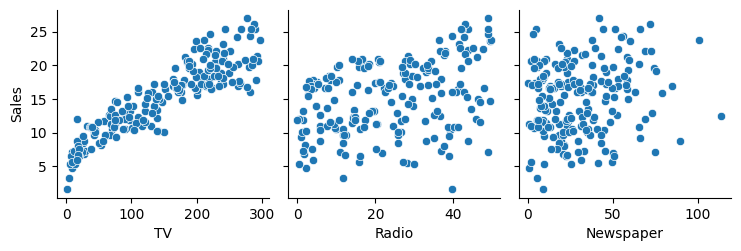

In [9]:
sns.pairplot(advert_data,x_vars=['TV','Radio','Newspaper'], y_vars='Sales', kind='scatter')
plt.show()

<font size="5">FEATURE SELECTION</font>


<Axes: >

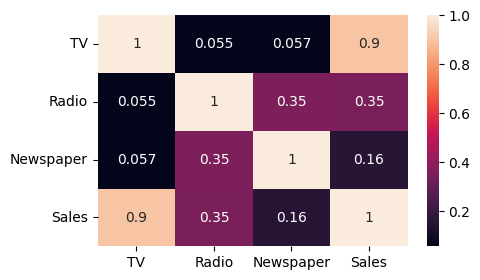

In [10]:
advert_data.corr()
plt.figure(figsize=(5,3))
sns.heatmap(advert_data.corr(),annot = True)

Sales is highly collerated with TV

In [11]:
df = advert_data.drop(["Sales"],axis =1)
df

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


In [12]:
vif_df = pd.DataFrame()
vif_df["Features"] = df.columns
vif_df

,Features
0,TV
1,Radio
2,Newspaper


In [13]:
vif_list = []
for i in range(df.shape[1]):
    vif = variance_inflation_factor(df.to_numpy(),i)
    vif_list.append(vif)
vif_list

[2.486771835198193, 3.285462100162896, 3.0552445106573853]

In [14]:
vif_df["VIF"] = vif_list
vif_df

,Features,VIF
0,TV,2.486772
1,Radio,3.285462
2,Newspaper,3.055245


<font size="5">SPLITTING DATA INTO FEATURES AND TARGETS</font>


In [15]:
X = advert_data[['TV', 'Radio', 'Newspaper']]
Y = advert_data['Sales']
X

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


In [16]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=5)  


In [17]:
X_train

,TV,Radio,Newspaper
159,131.7,18.4,34.6
62,239.3,15.5,27.3
166,17.9,37.6,21.6
45,175.1,22.5,31.5
23,228.3,16.9,26.2
...,...,...,...
73,129.4,5.7,31.3
144,96.2,14.8,38.9
118,125.7,36.9,79.2
189,18.7,12.1,23.4


<font size="5">MODEL TRAINING</font>


In [18]:
model = LinearRegression()

In [19]:
model.fit(X_train,Y_train)

LinearRegression()

In [20]:
Y_train_predict = model.predict(X_train)
Y_train_predict

array([13.80348255, 19.45276991,  9.52702771, 16.63164392, 18.99174982,
       11.15565562, 16.91249198, 18.79760951, 16.02985296,  9.08160524,
       15.03476347,  9.64313723, 16.92282873, 17.97201231, 13.80819657,
       10.59551237,  7.80002941, 21.15451203, 23.48278139, 12.39228055,
        8.59259124,  8.31115934, 19.34618433, 20.6495605 ,  9.5575105 ,
       18.98151354, 15.20062385, 21.49377518, 15.25116972, 14.14973617,
        8.93844533,  9.69505059, 13.3893224 , 10.10817743, 24.71872034,
       15.64533693, 20.36391947, 14.82532681,  8.87298412, 15.91418816,
       18.35015569, 14.67052208, 23.94606832, 16.91150076, 15.70558225,
       25.0131962 , 14.93509833, 13.02599002, 18.95271886,  9.92806048,
       18.28426558, 21.93448754,  5.98773558, 20.1460595 , 10.80918406,
       21.56604429,  8.79525163,  9.54104731,  9.52240472, 19.54927377,
       21.11933097, 18.79670579, 11.82938154, 20.11089333, 17.02427643,
       12.11492038, 10.17203414, 12.57857525,  7.78273266,  9.05

In [21]:
Y_test_predict = model.predict(X_test)

In [22]:
Y_train

159    12.9
62     20.7
166     8.0
45     16.1
23     20.5
       ... 
73     11.0
144    12.3
118    15.9
189     6.7
99     17.2
Name: Sales, Length: 160, dtype: float64

In [23]:
residual_train = Y_train - Y_train_predict
residual_train

159   -0.903483
62     1.247230
166   -1.527028
45    -0.531644
23     1.508250
         ...   
73    -1.354875
144    0.836946
118    0.534381
189   -0.211169
99     0.782737
Name: Sales, Length: 160, dtype: float64

<font size="5">KERNEL DESTINY ESTIMATE</font>


<Axes: xlabel='Sales', ylabel='Density'>

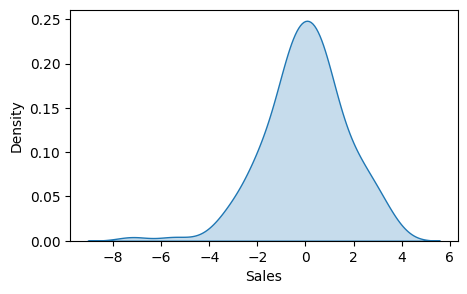

In [24]:
plt.figure(figsize=(5,3))
sns.kdeplot(residual_train,fill = True)

<font size="5">Homoscadasticity</font>


<Axes: ylabel='Sales'>

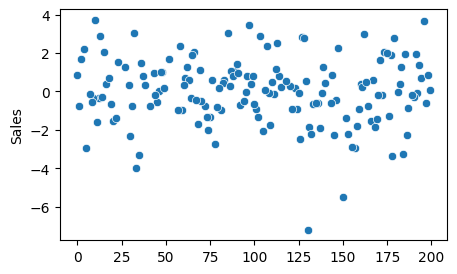

In [25]:
plt.figure(figsize=(5,3))
sns.scatterplot(residual_train)

<font size="5">MODEL PERFORMANCE</font>


In [26]:
#TRANING DATA

In [27]:
print("--------Model Evaluation on training data--------")
mse = mean_squared_error(Y_train,Y_train_predict)
print("Mean squared Error = ",mse)
print(50*"-")

mae = mean_absolute_error(Y_train,Y_train_predict)
print("Mean absolute Error = ",mae)
print(50*"-")

rmse = np.sqrt(mse)
print("Root Mean squared Error = ",rmse)
print(50*"-")

r2score = r2_score(Y_train,Y_train_predict)
print("R2 score = ",r2score)
print(50*"-")


--------Model Evaluation on training data--------
Mean squared Error =  2.9243072360654714
--------------------------------------------------
Mean absolute Error =  1.2997005074323797
--------------------------------------------------
Root Mean squared Error =  1.7100605942671947
--------------------------------------------------
R2 score =  0.8977583643230754
--------------------------------------------------


In [28]:
mse
mae
r2score

0.8977583643230754

In [29]:
#TESTING DATA

In [30]:
print("--------Model Evaluation on training data--------")
mse = mean_squared_error(Y_test,Y_test_predict)
print("Mean squared Error = ",mse)
print(50*"-")

mae = mean_absolute_error(Y_test,Y_test_predict)
print("Mean absolute Error = ",mae)
print(50*"-")

rmse = np.sqrt(mse)
print("Root Mean squared Error = ",rmse)
print(50*"-")

r2score = r2_score(Y_test,Y_test_predict)
print("R2 score = ",r2score)
print(50*"-")


--------Model Evaluation on training data--------
Mean squared Error =  1.8741138418894416
--------------------------------------------------
Mean absolute Error =  1.023777377931325
--------------------------------------------------
Root Mean squared Error =  1.3689827763304554
--------------------------------------------------
R2 score =  0.9217965732000767
--------------------------------------------------


<Axes: xlabel='TV', ylabel='Sales'>

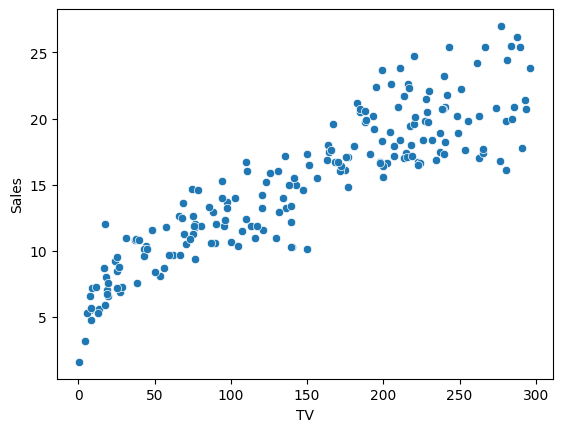

In [31]:
sns.scatterplot(x='TV', y='Sales', data=advert_data)

The Sales increase when the cost increases in TV advertising , on the other hand radio and newspaper are a bit unpredictable